In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving country_vaccinations.csv to country_vaccinations.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['country_vaccinations.csv']))

**Display Dataset**

In [ ]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2/23/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2/24/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2/25/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2/26/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14658,Zimbabwe,ZWE,4/25/2021,390018.0,336600.0,53418.0,17919.0,10796.0,2.62,2.26,0.36,726.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14659,Zimbabwe,ZWE,4/26/2021,411610.0,353834.0,57776.0,21592.0,13517.0,2.77,2.38,0.39,909.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14660,Zimbabwe,ZWE,4/27/2021,433939.0,370676.0,63263.0,22329.0,15562.0,2.92,2.49,0.43,1047.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14661,Zimbabwe,ZWE,4/28/2021,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...


**Displaying First 5 rows of Dataset**

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2/23/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2/24/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2/25/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2/26/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


**Displaying Last 5 rows of Dataset**

In [ ]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
14658,Zimbabwe,ZWE,4/25/2021,390018.0,336600.0,53418.0,17919.0,10796.0,2.62,2.26,0.36,726.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14659,Zimbabwe,ZWE,4/26/2021,411610.0,353834.0,57776.0,21592.0,13517.0,2.77,2.38,0.39,909.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14660,Zimbabwe,ZWE,4/27/2021,433939.0,370676.0,63263.0,22329.0,15562.0,2.92,2.49,0.43,1047.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14661,Zimbabwe,ZWE,4/28/2021,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14662,Zimbabwe,ZWE,4/29/2021,477597.0,400771.0,76826.0,19584.0,17971.0,3.21,2.70,0.52,1209.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...


**Summary of the Data Frame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14663 entries, 0 to 14662
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              14663 non-null  object 
 1   iso_code                             14663 non-null  object 
 2   date                                 14663 non-null  object 
 3   total_vaccinations                   8757 non-null   float64
 4   people_vaccinated                    8135 non-null   float64
 5   people_fully_vaccinated              5955 non-null   float64
 6   daily_vaccinations_raw               7350 non-null   float64
 7   daily_vaccinations                   14466 non-null  float64
 8   total_vaccinations_per_hundred       8757 non-null   float64
 9   people_vaccinated_per_hundred        8135 non-null   float64
 10  people_fully_vaccinated_per_hundred  5955 non-null   float64
 11  daily_vaccinations_per_milli

In [ ]:
df.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5906
people_vaccinated                      6528
people_fully_vaccinated                8708
daily_vaccinations_raw                 7313
daily_vaccinations                      197
total_vaccinations_per_hundred         5906
people_vaccinated_per_hundred          6528
people_fully_vaccinated_per_hundred    8708
daily_vaccinations_per_million          197
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

**Data Cleaning**

Filling out Null Values

In [ ]:
df.fillna(value=0, inplace=True)
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2/23/2021,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2/24/2021,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2/25/2021,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2/26/2021,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14658,Zimbabwe,ZWE,4/25/2021,390018.0,336600.0,53418.0,17919.0,10796.0,2.62,2.26,0.36,726.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14659,Zimbabwe,ZWE,4/26/2021,411610.0,353834.0,57776.0,21592.0,13517.0,2.77,2.38,0.39,909.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14660,Zimbabwe,ZWE,4/27/2021,433939.0,370676.0,63263.0,22329.0,15562.0,2.92,2.49,0.43,1047.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14661,Zimbabwe,ZWE,4/28/2021,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...


**Changing data types to integers**

In [ ]:
df.total_vaccinations = df.total_vaccinations.astype(int)
df.people_vaccinated = df.people_vaccinated.astype(int)
df.people_fully_vaccinated = df.people_fully_vaccinated.astype(int)
df.daily_vaccinations_raw = df.daily_vaccinations_raw.astype(int)
df.total_vaccinations_per_hundred = df.total_vaccinations_per_hundred.astype(int)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.astype(int)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.astype(int)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.astype(int)
df.daily_vaccinations = df.daily_vaccinations.astype(int)

**Split the String data type**

In [ ]:
date = df.date.str.split('-', expand=True)


In [ ]:
print('Data point starts from ',df.date.min())
print('Data point ends at ',df.date.max())
print('Total no of countries in the data set ',len(df.country.unique()))
print('Total no of unique vaccines in the data set ',len(df.vaccines.unique()))

Data point starts from  1/1/2021
Data point ends at  4/9/2021
Total no of countries in the data set  194
Total no of unique vaccines in the data set  34


**Total Vaccinated Till Date**

In [ ]:
import plotly.express as px

In [ ]:
country_wise_total_vaccinated = {}
for country in df.country.unique() : 
    vaccinated = 0
    for i in range(len(df)) : 
        if df.country[i] == country : 
            vaccinated += df.daily_vaccinations[i]
    country_wise_total_vaccinated[country] = vaccinated 
#     made a seperate dict from the df 
    country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated,
                                                         orient='index',
                                                         columns = ['total_vaccinated_till_date'])
#     converted dict to df 
country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinated_till_date', ascending = False, inplace = True)
country_wise_total_vaccinated_df

,total_vaccinated_till_date
China,231080645
United States,230104086
India,142595311
United Kingdom,45759847
Brazil,39307946
...,...
Ethiopia,0
Libya,0
Djibouti,0
Somalia,0


In [ ]:
fig = px.bar(country_wise_total_vaccinated_df, 
             y = 'total_vaccinated_till_date',
             x = country_wise_total_vaccinated_df.index,
             color = 'total_vaccinated_till_date',
             color_discrete_sequence= px.colors.sequential.Viridis_r
            )
fig.update_layout(
    title={
            'text' : "Vaccination till date in various countries",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Countries",
    yaxis_title="Total vaccinated",
    # legend_title="Total vaccinated"
)
fig.show()

**Conclusion:**


*  Top 5 countries which have highest number of vaccinations are *China*, United 
States, India, United Kingdom and Brazil.
*  Contries like Ethiopia, Libya, Dijibouti, Somalia, Timor have 0 vaccinations till date.







**Country wise Daily Vaccination**


In [ ]:
fig = px.line(df, x = 'date', y ='daily_vaccinations', color = 'country')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

**Obsrevation**: The vaccination trend in every country is of mixed nature.

**Daily Vaccination Trend per million**

In [ ]:
fig = px.line(df, x = 'date', y ='daily_vaccinations_per_million', color = 'country')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend per million",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations per million"
)
fig.show()

**Observation**: *Bhutan* has the highest daily vaccinations per million.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

**Different types of Vaccines**

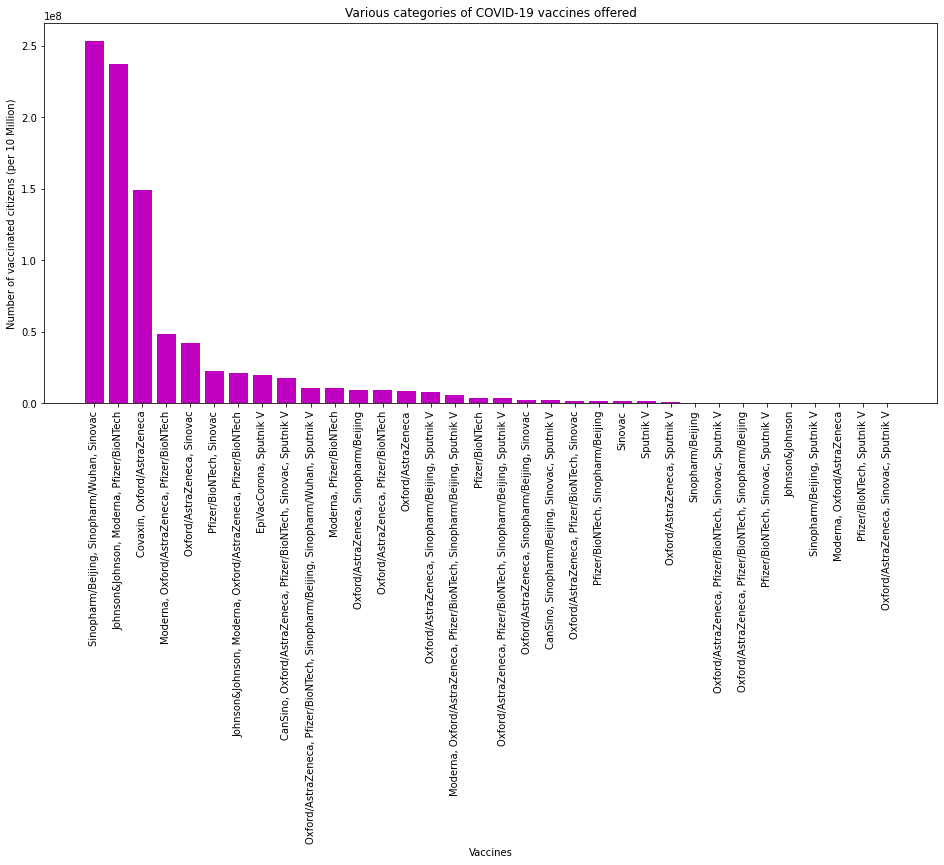

In [ ]:
plt.figure(figsize=(16,7))
grp = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_no = df[grp].groupby('vaccines').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])


plt.bar(vacc_no.index, vacc_no.total_vaccinations, color ='m')

plt.title('Various categories of COVID-19 vaccines offered')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens (per 10 Million)')
plt.xlabel('Vaccines')
plt.show();

**Observation:**


*   *Sinovac* tops the list of most used vaccines in the world followed by *Pfizer* and *Oxford*.


